## 1) Problem statement

Analysis of Unemployment Rate with python

## 2) Data Collection

- Dataset Source -
https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india

### 2.1 Import Data and Required Packages

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 2.2 Importing datasets

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/NinadKarlekar/OIBSIP_Internship_Ninad/main/Dataset/Unemployment%20in%20India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


print("Before changing")
print(df.columns)

### Removing extra space in coloumn names

In [4]:
df = df.rename(columns={' Date': 'Date'})
df = df.rename(columns={' Frequency': 'Frequency'})
df = df.rename(columns={' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate (%)'})
df = df.rename(columns={' Estimated Employed': 'Estimated Employed'})
df = df.rename(columns={' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate (%)'})


In [5]:
print("After changing")
print(df.columns)


After changing
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


### Let's get stastical information about the dataset

In [6]:
#number of rows and columns
df.shape

(768, 7)

In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


## 3. Data Checks to perform
- Check Missing values
- Check the number of unique values of each column
- Check data type
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isna().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [9]:
# Remove null values using dropna()
df = df.dropna()

df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

There are no missing values in the data set

### 3.2 Checking the number of unique values of each column

In [10]:
df.nunique()

Region                                      28
Date                                        14
Frequency                                    2
Estimated Unemployment Rate (%)            624
Estimated Employed                         740
Estimated Labour Participation Rate (%)    626
Area                                         2
dtype: int64

### 3.3 Check data types

In [11]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

### 3.4 Check statistics of data set 

In [12]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


<br>

## 4. Exploring Data ( Visualization )

###  bar graph (Unemployment Rate by State)

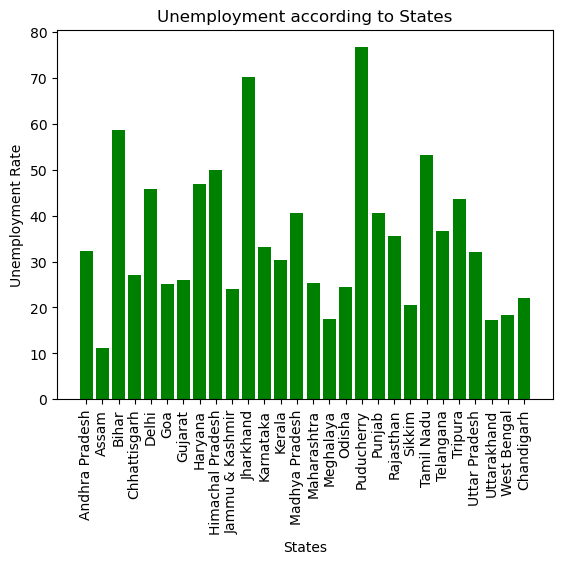

In [13]:
plt.bar(df['Region'], df['Estimated Unemployment Rate (%)'], color='green')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment according to States')
plt.show()

<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- **Puducherry** stands out as having the **highest unemployment rate** compared to other states. This indicates a potentially challenging employment situation in Puducherry.

- Policymakers and stakeholders can utilize this information to focus on Puducherry and develop strategies to **promote job creation, skills development, and economic growth** in order to tackle the unemployment issue effectively.

</p>
</div>


### Pairwise Relationships in the Dataset

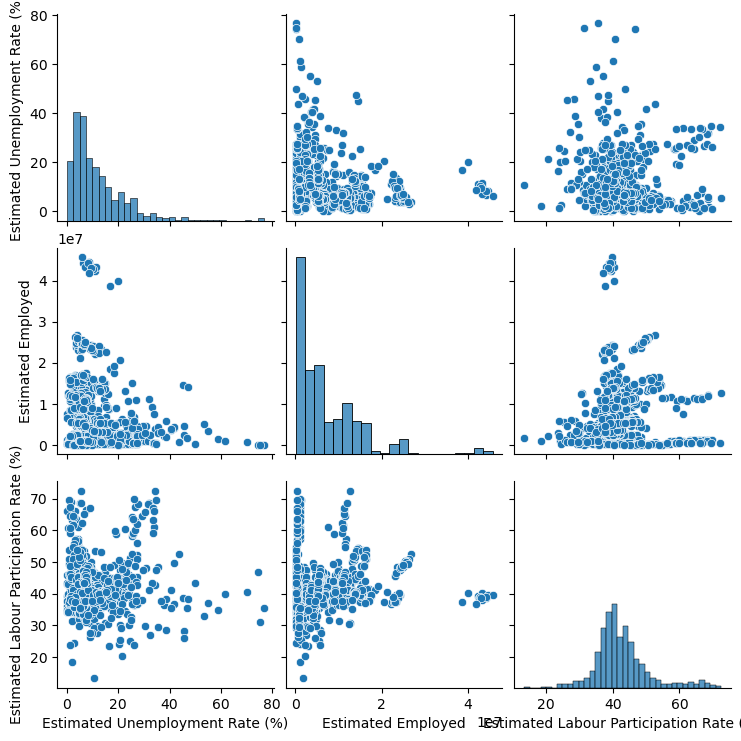

In [14]:
sns.pairplot(df)

### Box plot (Unemployment Rate Distribution by Area)

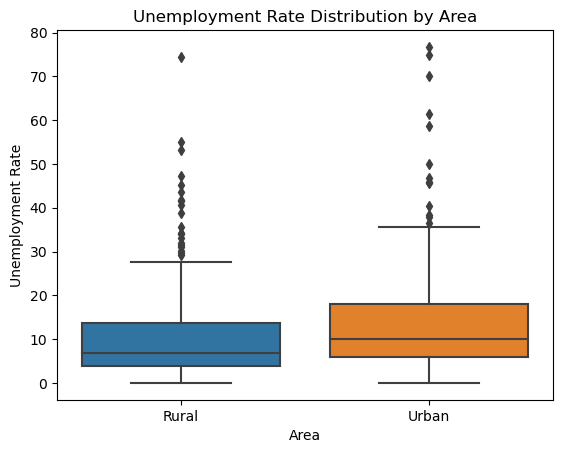

In [15]:
# Create a box plot
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Unemployment Rate Distribution by Area')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate')
plt.show()

<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- **The median unemployment rate in urban areas appears to be higher compared to rural areas**. This suggests that urban areas may face higher levels of unemployment on average.
</p>
</div>


### Pie chart (distribution of unemployment rates across different areas)

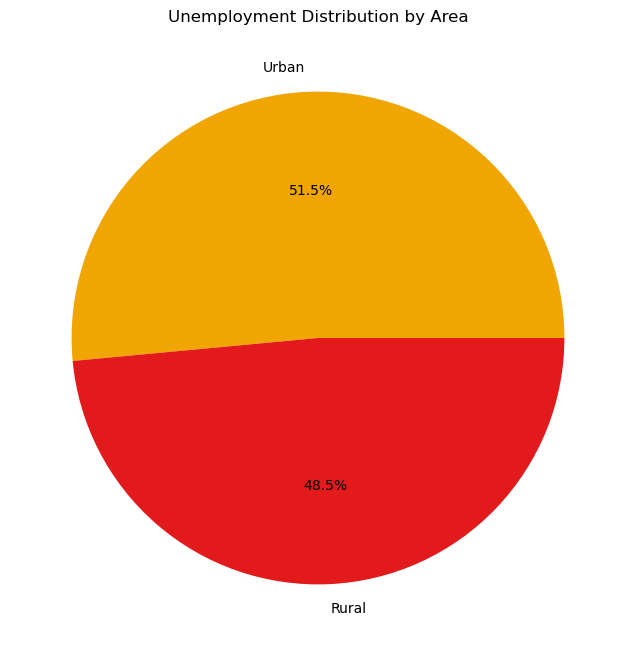

In [16]:
# Calculate the total unemployed population for each area
area_counts = df['Area'].value_counts()

# Define the labels and colors for the pie chart
labels = area_counts.index
colors = ['#f0a500', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(area_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Unemployment Distribution by Area')
plt.show()

<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- **Urban areas** have a higher proportion of the unemployed population compared to rural areas. Approximately **`51.5%`** of the total unemployed population is located in urban areas.

- **Rural areas** also contribute significantly to the overall unemployment, accounting for approximately **`48.5%`** of the unemployed population.

- Policymakers and stakeholders can use this information to prioritize and tailor interventions to address the specific needs and challenges faced by each area, with the aim of reducing unemployment and fostering economic growth.
    
</p>
</div>


### Unemployment Trend Over Time

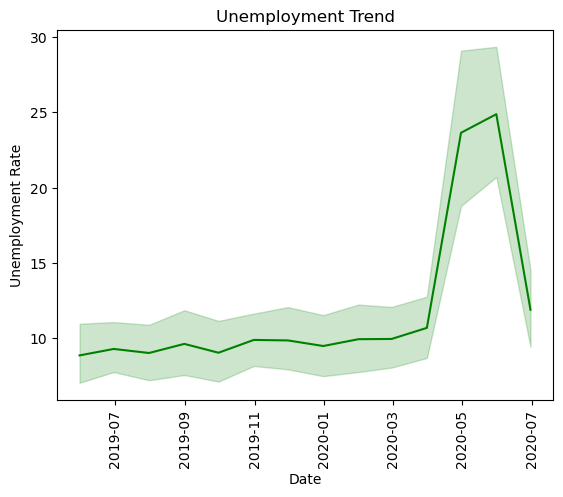

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the "Date" column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create a line plot with green color
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, color='green')
plt.title('Unemployment Trend')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- The line plot showcases the trend of the estimated unemployment rate over time, with a focus on the period **from May 2020 to July 2020**. During this period, **there is a noticeable sudden spike in the unemployment rate**, represented by the sharp increase in the green line.

- One possible observation for this spike in unemployment rate could be the **impact of the COVID-19 pandemic**, which significantly affected various industries and led to widespread job losses during that time. The **imposed lockdowns, travel restrictions, and economic uncertainties resulted in business closures, reduced workforce, and limited job opportunities,** ultimately leading to a surge in unemployment rates.
    
</p>
</div>


### Average labour participation rate by region

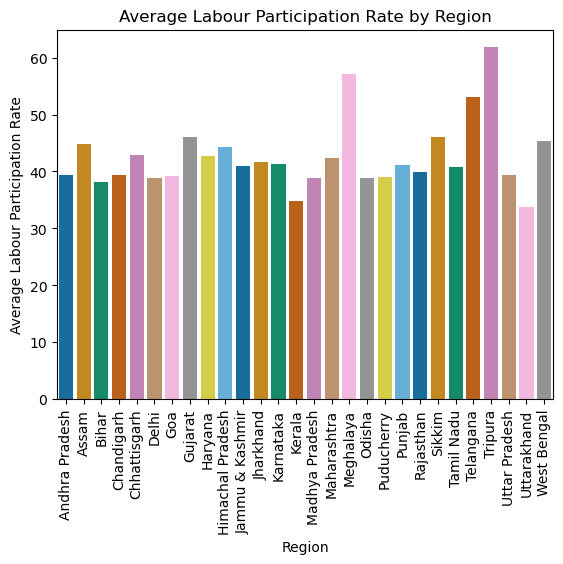

In [18]:
average_participation_rate = df.groupby('Region')['Estimated Labour Participation Rate (%)'].mean()

# Create a bar plot
sns.barplot(x=average_participation_rate.index, y=average_participation_rate.values,  palette = "colorblind")
plt.title('Average Labour Participation Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Labour Participation Rate')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- Based on the bar plot visualization of the average labour participation rate by region, it can be observed that **Tripura has the highest average labour participation rate** among the regions. This indicates that, on average, a larger proportion of the population in Tripura is actively participating in the labor force compared to other regions in the dataset.

- The higher average labour participation rate in Tripura could be attributed to various factors such as **government policies, economic opportunities, local industries, or cultural factors** that promote workforce participation.
    
</p>
</div>
